# Detection and Picking
This notebook demonstrates the use of EQTransformer for performing the earthquake signal detection and seismic phase (P & S) picking on continuous data. Once you have your seismic data - preferentially in mseed format and in individual subfolders for each station- you can perform the detection/picking using the following options:


### Option (I) on preprocessed (hdf5) files:

This option is recommended for smaller time periods (a few days to a month). This allows you to test the perfomance and explore the effects of different parameters while the provided hdf5 file makes it easy to access the waveforms.

For this option you first need to convert your MiniSeed files for each station into a single hdf5 file and generated a csv file containting the list of traces in the hdf5 file. You can do this using the following command:

In [2]:
from EQTransformer.utils.hdf5_maker import preprocessor
preprocessor(mseed_dir='downloads_mseeds', 
             stations_json='station_list.json', 
             overlap=0.3,
             n_processor=2)

 *** " downloads_mseeds " directory already exists!
 * --> Do you want to creat a new empty folder? Type (Yes or y) y
============ Station SV08 has 2 chunks of data.
============ Station B921 has 2 chunks of data.
  * SV08 (1) .. 20190901 --> 20190902 .. 3 components .. sampling rate: 100.0
  * B921 (1) .. 20190901 --> 20190902 .. 3 components .. sampling rate: 100.0
  * SV08 (2) .. 20190902 --> 20190903 .. 3 components .. sampling rate: 100.0
  * B921 (2) .. 20190902 --> 20190903 .. 3 components .. sampling rate: 100.0
 Station SV08 had 2 chuncks of data
4112 slices were written, 4114.0 were expected.
Number of 1-components: 0. Number of 2-components: 0. Number of 3-components: 2.
Original samplieng rate: 100.0.
============ Station CA06 has 2 chunks of data.
  * CA06 (1) .. 20190901 --> 20190902 .. 3 components .. sampling rate: 100.0
 Station B921 had 2 chuncks of data
4112 slices were written, 4114.0 were expected.
Number of 1-components: 0. Number of 2-components: 0. Number of 3-c

This will generate one "station_name.hdf5" and one "station_name.csv" file for each of your stations and put them into a directory named "mseed_dir+_hdfs". Then you need is to pass the name of the directory containing your hdf5 & CSV files and a model. You can use relatively low threshold values for the detection and picking since EQTransformer is very robust to false positives. Enaibeling uncertaintiy estimation, outputing probabilities, or plotting all the detected events will slow down the process.

In [17]:
from EQTransformer.core.predictor import predictor
predictor(input_dir= 'downloads_mseeds_processed_hdfs',   
         input_model='sampleData&Model/EqT1D8pre_048.h5',
         output_dir='detections1',
         estimate_uncertainty=False, 
         output_probabilities=False,
         number_of_sampling=5,
         loss_weights=[0.02, 0.40, 0.58],          
         detection_threshold=0.30,                
         P_threshold=0.1,
         S_threshold=0.1, 
         number_of_plots=100,
         plot_mode = 'time',
         batch_size=500,
         number_of_cpus=4,
         keepPS=False,
         spLimit=60) 

Running EqTransformer  None
 *** Loading the model ...
*** Loading is complete!
 *** /Users/mostafamousavi/Downloads/shadow-master/doc/source/examples/detections1 already exists!
 --> Type (Yes or y) to create a new empty directory! otherwise it will overwrite!   y
######### There are files for 3 stations in downloads_mseeds_processed_hdfs directory. #########
========= Started working on B921, 1 out of 3 ...

100%|█████████████████████████████████████████████████████████████████| 9/9 [02:07<00:00, 10.89s/it]

 *** Finished the prediction in: 0 hours and 2 minutes and 9.37 seconds.
 *** Detected: 2899 events.
 *** Wrote the results into --> " /Users/mostafamousavi/Downloads/shadow-master/doc/source/examples/detections1/B921_outputs "
========= Started working on CA06, 2 out of 3 ...


  0%|                                                                         | 0/9 [00:00<?, ?it/s]

 22%|██████████████▍                                                  | 2/9 [00:48<02:48, 24.08s/it]



### Option (II) directly on downloaded MiniSeed files:

You can perform the detection/picking directly on .mseed files. 
This save both prerpcessing time and the extra space needed for hdf5 file. However, it can be more memory intensive. So it is recommended when mseed fils are one month long or shorter.
This option also does not allow you to estimate the uncertainties, write the prediction probabilities, or use the advantages of having hdf5 files which makes it easy to access the raw event waveforms based on detection results.   

In [24]:
from EQTransformer.core.mseed_predictor import mseed_predictor
mseed_predictor(input_dir= 'downloads_mseeds',   
         input_model='sampleData&Model/EqT1D8pre_048.h5',
         stations_json='station_list.json',
         output_dir='detections2',
         loss_weights=[0.02, 0.40, 0.58],          
         detection_threshold=0.30,                
         P_threshold=0.1,
         S_threshold=0.1, 
         number_of_plots=100,
         plot_mode = 'time_frequency',
         normalization_mode='std',
         overlap = 0.3,
         gpuid=None,
         gpu_limit=None) 

Running EqTransformer  None
 *** Loading the model ...
*** Loading is complete!
######### There are files for 3 stations in downloads_mseeds directory. #########
========= Started working on B921, 1 out of 3 ...
20190901T000000Z__20190902T000000Z.mseed
20190902T000000Z__20190903T000000Z.mseed


 *** Finished the prediction in: 0 hours and 2 minutes and 32.36 seconds.
 *** Detected: 1459 events.
 *** Wrote the results into --> " /Users/mostafamousavi/Downloads/shadow-master/doc/source/examples/detections2/B921_outputs "
========= Started working on CA06, 2 out of 3 ...
20190901T000000Z__20190902T000000Z.mseed
20190902T000000Z__20190903T000000Z.mseed


 *** Finished the prediction in: 0 hours and 2 minutes and 19.67 seconds.
 *** Detected: 1316 events.
 *** Wrote the results into --> " /Users/mostafamousavi/Downloads/shadow-master/doc/source/examples/detections2/CA06_outputs "
========= Started working on SV08, 3 out of 3 ...
20190901T000000Z__20190902T000000Z.mseed
20190902T000000Z__201

Prediction outputs for each station will be written in your output directory (i.e. 'detections').

'X_report.txt' contains processing info on input parameters used for the detection/picking and final 
results such as running time, the total number of detected events (these are unique events and duplicated ones have been already removed). 

'X_prediction_results.csv' contains detection/picking results in the figures folder you can find the plots for the number of events that you specified in the above comment.

You can choose between two different modes for your plots:
1) 'time':

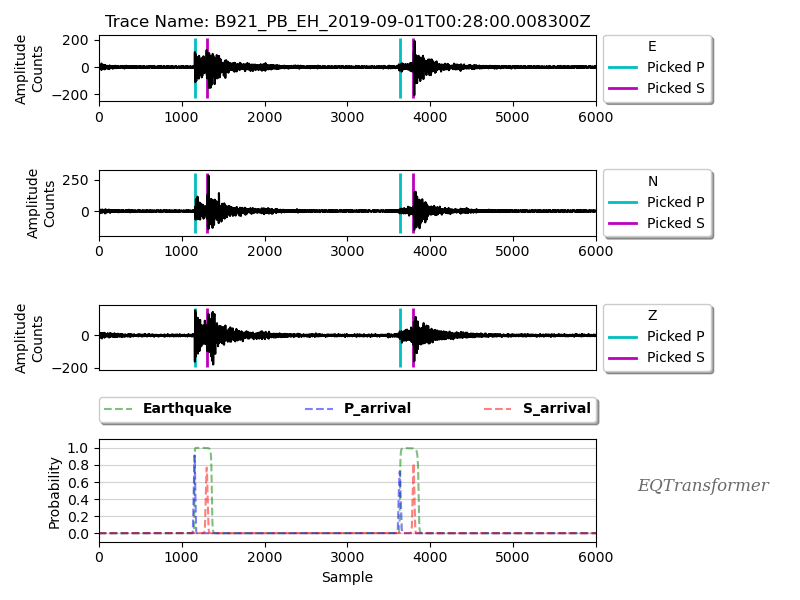

2) 'time_frequency':

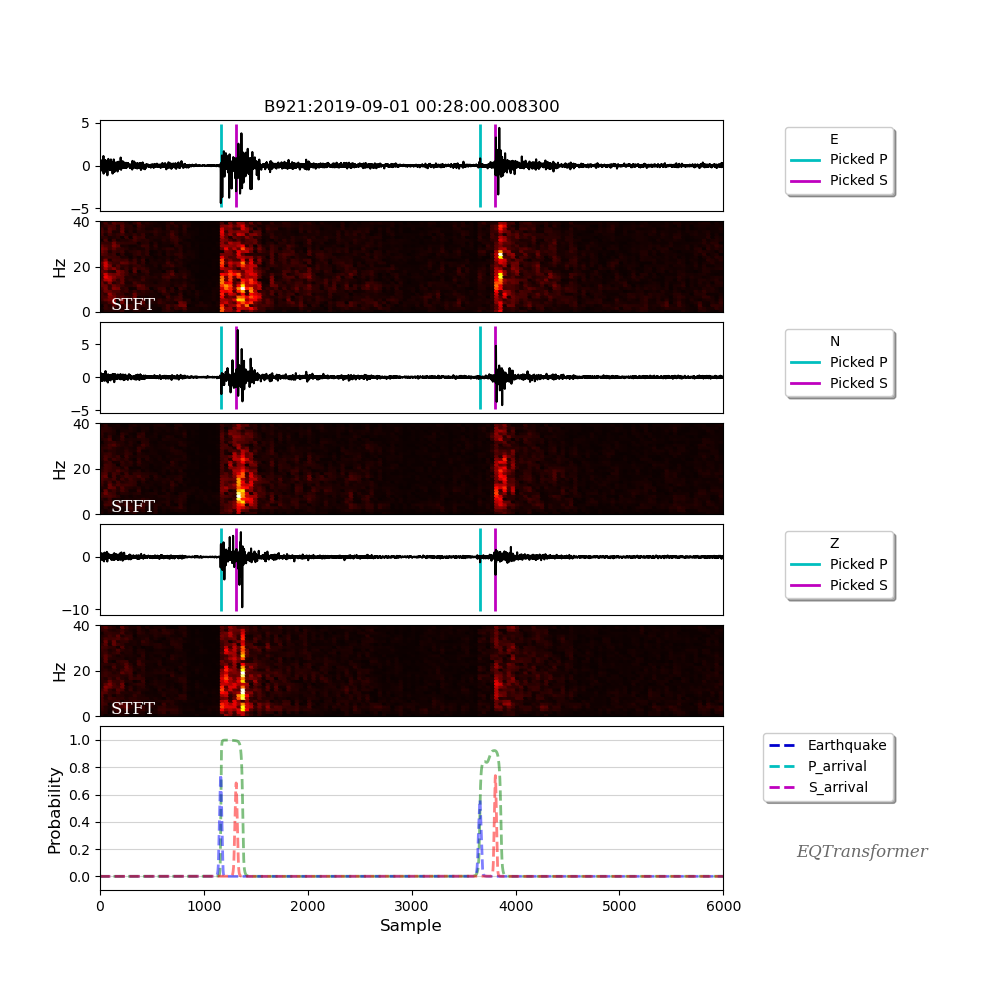